In [20]:
import pandas as pd
import numpy as np
import seaborn as sns; sns.set(color_codes=True)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

In [21]:
fb=pd.read_csv('dataset_Facebook.csv',sep=';')
print(fb.columns)

print(fb.isnull().sum())
columns_with_nan = fb.columns[fb.isna().any()].tolist()
fb2=fb[~fb['Paid'].isnull()]
fb2=fb2[~fb2['like'].isnull()]
fb2=fb2[~fb2['share'].isnull()]


X=pd.concat([fb2.iloc[:,:10],fb2.iloc[:,11:]], axis=1)
y=fb2.iloc[:,10].values

Index(['Page total likes', 'Type', 'Category', 'Post Month', 'Post Weekday',
       'Post Hour', 'Paid', 'Lifetime Post Total Reach',
       'Lifetime Post Total Impressions', 'Lifetime Engaged Users',
       'Lifetime Post Consumers', 'Lifetime Post Consumptions',
       'Lifetime Post Impressions by people who have liked your Page',
       'Lifetime Post reach by people who like your Page',
       'Lifetime People who have liked your Page and engaged with your post',
       'comment', 'like', 'share', 'Total Interactions'],
      dtype='object')
Page total likes                                                       0
Type                                                                   0
Category                                                               0
Post Month                                                             0
Post Weekday                                                           0
Post Hour                                                              0
Paid    

In [22]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()

X['Type'] = labelencoder_X.fit_transform(X.iloc[:,1])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train,y_train)
# Predicting a new result
y_pred=regressor.predict(X_test)

Text(0.5, 1.0, 'Decision Tree Model')

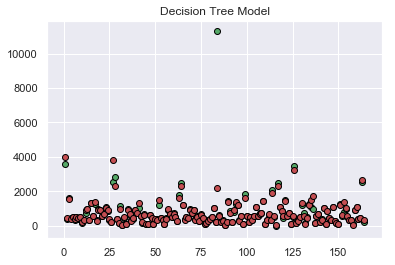

In [23]:
plt.figure()
X_grid = np.arange(1, X_test.shape[0]+1, 1)
plt.scatter(X_grid, y_test, c='g', label='data', zorder=1,
            edgecolors=(0, 0, 0))

plt.scatter(X_grid, y_pred, c='r', label='test', zorder=1,
            edgecolors=(0, 0, 0))

plt.title("Decision Tree Model")

Text(0.5, 1.0, 'Decision Tree Regressor Model- Actual vs Predict')

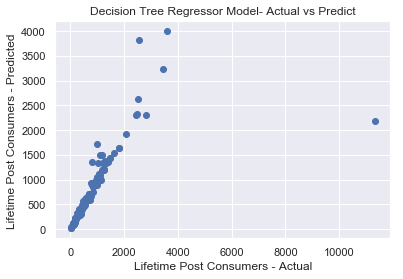

In [24]:
plt.figure()
plt.scatter(y_test,y_pred)
plt.xlabel("Lifetime Post Consumers - Actual")
plt.ylabel("Lifetime Post Consumers - Predicted ")
plt.title("Decision Tree Regressor Model- Actual vs Predict")

In [25]:
# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)

regr_1.fit(X_train, y_train)
regr_2.fit(X_train, y_train)

# Predict

y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)



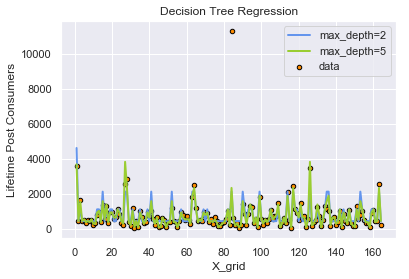

In [26]:
# Plot the results
plt.figure()
X_test_grid = np.arange(1, X_test.shape[0]+1, 1)

plt.scatter(X_test_grid, y_test, s=20, edgecolor="black",
            c="darkorange", label="data")

plt.plot(X_test_grid, y_1, color="cornflowerblue",
         label="max_depth=2", linewidth=2)
plt.plot(X_test_grid, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("X_grid")
plt.ylabel("Lifetime Post Consumers")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

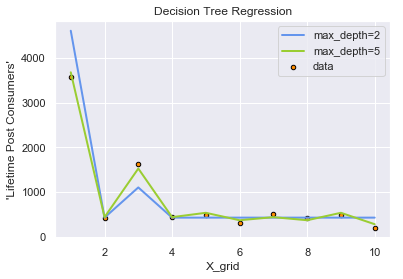

In [27]:
# Plot the results
plt.figure()
X_test_grid = np.arange(1, 11, 1)

plt.scatter(X_test_grid, y_test[:10], s=20, edgecolor="black",
            c="darkorange", label="data")

plt.plot(X_test_grid, y_1[:10], color="cornflowerblue",
         label="max_depth=2", linewidth=2)
plt.plot(X_test_grid, y_2[:10], color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("X_grid")
plt.ylabel("'Lifetime Post Consumers'")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()